DATA PREROCESSING


In [ ]:
import numpy as np
import pandas as pd

Import Dataset

In [ ]:
dataset = pd.read_csv('Data.csv')

#menampilkan shape dari data yg kita punya
print('dataset:', (str(dataset.shape)))

dataset: (15, 4)


In [ ]:
# print the dataset
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


Handle Misssing Data

In [ ]:
#cek data null disetiap kolom
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
dataset['Age'].fillna(28, inplace=True)
dataset['Age']

0     34.0
1     22.0
2     31.0
3     29.0
4     55.0
5     24.0
6     28.0
7     28.0
8     51.0
9     44.0
10    21.0
11    25.0
12    33.0
13    42.0
14    33.0
Name: Age, dtype: float64

In [ ]:
dataset.loc[3, 'Salary'] = 50000.0
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,50000.0,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,28.0,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


VISUALISASI

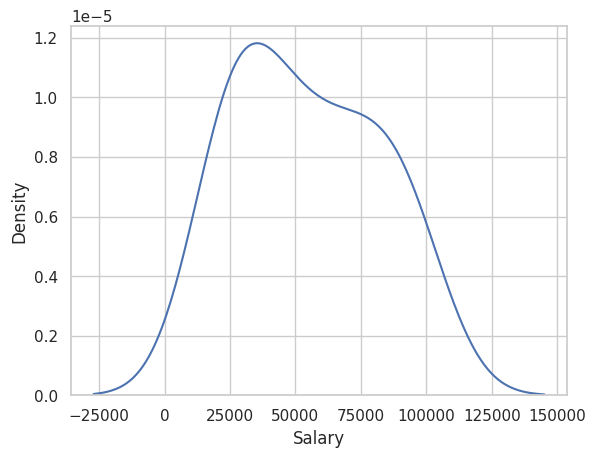

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')
ax = sns.kdeplot(x='Salary', data=dataset)

# countplot = Diagram batang dengan menghitung variasi
#Max variasi data 6
# kdeplot = Diagram garis. Data berjangkau atau range
# displot = DIagram batang tanpa menghitung variasis

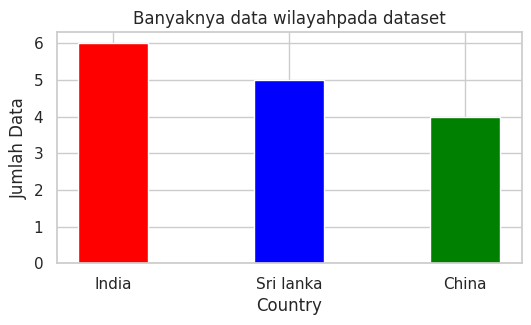

In [ ]:
import matplotlib.pyplot as plt

x = list(dataset['Country'].unique())
y = list(dataset['Country'].value_counts())

fig = plt.figure(figsize = (6,3))

plt.bar(x, y, color =['red', 'blue', 'green', 'yellow'],
        width=0.4)

plt.xlabel('Country')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya data wilayahpada dataset')
plt.show()

KNN

In [ ]:
#memisahkan antara fitur dan label

#fitur
#iloc[rows,columns] (slicing pada dataframe)
#mengambil semua data dalam barisan
#mengambil kolom index ke-0 sampai ke-2
X = dataset.iloc[:,:3].values

#Label
#iloc[rows, columns]  (slicing pada dataframe)
#mengambil semua data dalam barisan
#hanya mengambil kolom index ke-3
Y = dataset.iloc[:,3].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Encode untuk data kategorikal pada kolom 'Country'
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,0]

array([1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2], dtype=object)

Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                 random_state = 0,
                                                 shuffle=False)

In [ ]:
X_train

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 50000.0],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 28.0, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0]], dtype=object)

In [ ]:
X_test

array([[1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

MODELLING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=5
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

In [ ]:
Y_test

array(['Yes', 'Yes', 'No'], dtype=object)

In [ ]:
Y_train

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes'], dtype=object)

In [ ]:
from sklearn import metrics

y_predict = knn.predict(X_test)
print(y_predict)

['No' 'Yes' 'No']


In [ ]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

Test set Accuracy:  0.6666666666666666


In [ ]:
cm = metrics.confusion_matrix(Y_test, y_predict, labels= ['No', 'Yes'])

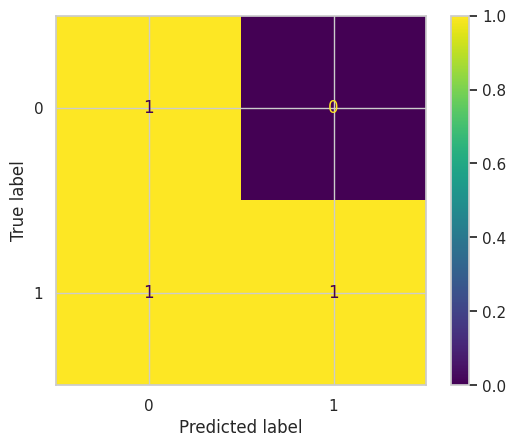

In [ ]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=[0,1])

disp.plot()
plt.show()